In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tensorflow as tf


2024-03-20 21:00:25.200092: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-20 21:00:25.200657: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 21:00:25.204781: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 21:00:25.260367: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 21:00:26.475695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)


In [3]:
# Definir o modelo de rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.2321 - loss: 1.1042 - val_accuracy: 0.3333 - val_loss: 1.1071
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3490 - loss: 1.0958 - val_accuracy: 0.3333 - val_loss: 1.1004
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3698 - loss: 1.0924 - val_accuracy: 0.3333 - val_loss: 1.0953
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3500 - loss: 1.0861 - val_accuracy: 0.3333 - val_loss: 1.0916
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2938 - loss: 1.0911 - val_accuracy: 0.3333 - val_loss: 1.0880
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3240 - loss: 1.0828 - val_accuracy: 0.3333 - val_loss: 1.0842
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3250 - loss: 1.0793 - val_accuracy: 0.3333 - val_loss: 1.0804
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3604 - loss: 1.0692 - val_accuracy: 0.3333 - val_loss:

In [5]:
# Avaliar a precisão do modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Acurácia no conjunto de teste:', test_acc)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9667 - loss: 0.5452
Acurácia no conjunto de teste: 0.9666666388511658


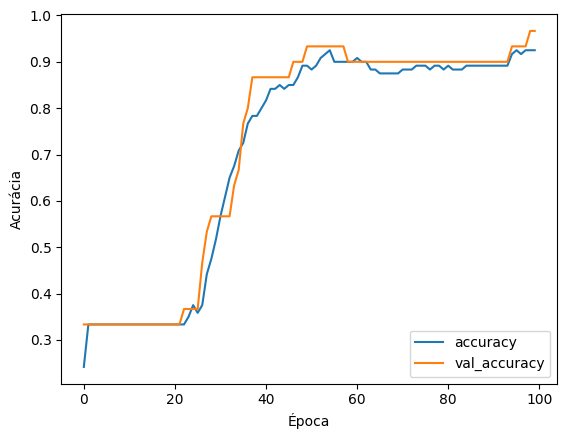

In [6]:
# Plotar a curva de aprendizado
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.show()
